In [ ]:
Graficas Tauc

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Graficas Tauc y band Gap

* Juan Esteban Ospina
* Alejandra Echeverry
* Santiago Moreno

### Introducción

### Calculo del band gap

Perovskita


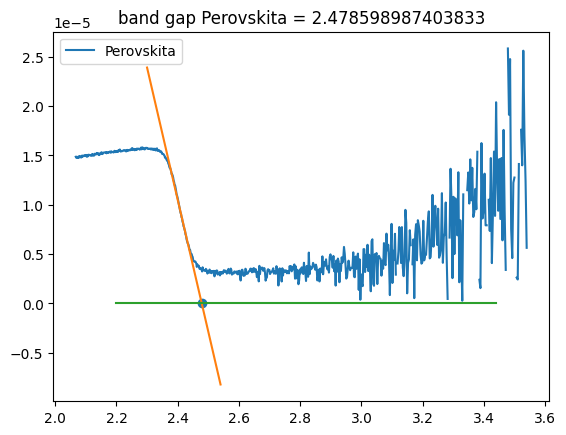

In [11]:
def bandas(dark,reference,sample,a,b, name,gamma,xmin,xmax,plot = False):
    """Esta funcion lee los datos del espectrofotometro"""
    h = 4.135667662e-15 #eV*s
    c = 299792458 #m/s
    dark = dark[(dark['Wavelength']>=a )& (dark['Wavelength']<=b)]
    reference = reference[(reference['Wavelength']>=a) & (reference['Wavelength']<=b)]
    sample = sample[(sample['Wavelength']>=a ) & (sample['Wavelength']<=b)]
    reflectancia = (sample['Intensity'] - dark['Intensity'])*100/(reference['Intensity'] - dark['Intensity'])
    F = (1-reflectancia)**2/(2*reflectancia) #Kubelka-Munk function
    wave = sample['Wavelength']*1e-9
    x = c/wave*h
    y = (F*c/sample['Wavelength']*h)**(1/gamma)

    if plot:
        plt.title(name)
        plt.plot(x,y, label = name)
        plt.legend()
    filtro = (x > xmin) & (x < xmax)
    x = x[filtro]
    y = y[filtro]
    m,inter = np.polyfit(x,y,1)
    intercepto_x = -inter/m
    x = np.linspace(xmin-0.1,xmax+0.1,len(y))
    plt.plot(x,m*x+inter)
    plt.plot([xmin-0.2,xmax+1],[0,0])
    plt.scatter(intercepto_x,0)
    plt.title("band gap {} = {}".format(name,intercepto_x))
    plt.savefig("band_gap_" + name + ".png")
    
    return True


df_perovskitaD = pd.read_csv('clean_data/Perovskita.Master.dark.csv')
df_perovskitaR = pd.read_csv('clean_data/Perovskita.Master.reference.csv')
df_perovskitaS = pd.read_csv('clean_data/Perovskita.Master.sample.csv') 
bandas(df_perovskitaD,df_perovskitaR,df_perovskitaS,200,600,"Perovskita",3/2,2.4,2.44,True)
print("Perovskita")

In [139]:
(c/600e-9)*h

2.066403289770155